## $\textbf{Tarea 08: Integración}$
### $\textbf{Métodos Computacionales: Taller}$
#### $\textbf{Gabriel Cataño Sánchez}$

# Integrales definidas:   Este programa muestra como es el uso del cálculo del error en el metodo del trapecio 

#Metodo del trapecio

> $$
  \int_{a}^{b} f(x)\,dx 
  = \sum_{i=0}^{N-1}  \int_{i}^{x_{i+1}} f(x)\,dx
  =  \frac{h}{2} \sum_{i=0}^{N-1}(f(x_i)+f(x_{i+1})) 
    - \frac{(b-a) h^2}{12}f''(\xi),
  $$

donde $\xi\in [b,a]$, $h=a-b$

\epsilon=0.001



## Cálculo del error para que sea menor $\epsilon$. 

Sea 

>$$
 \int_0^1 \log(1+x^2)\, dx
 $$

 \epsilon=0.001


In [18]:
a, b = 0,  1.

def f(x): 
  return np.log(1 + x ** 2)

epsilon = 0.001

Para encontrar el error, se debe de encontrar el maximo de $f''(\xi)$, para ello empleemos la libreria sympy, para mostrar que la derivada de la función es:


  * $\displaystyle f'(x)=\frac{2x}{1+x^2}$
  * $\displaystyle f''(x)=\frac{2(1+x^2) - 2x\cdot2x}{(1+x^2)^2}
      = \frac{2 - 2x^2}{(1+x^2)^2}$
  


In [1]:
#=================================================
import sympy as sp 
import numpy as np
import matplotlib.pylab as plt
from sympy import init_printing
from scipy import  optimize
init_printing() 
#=================================================


In [2]:
f_s = lambda x: sp.log(1 + x**2)#Definicion de la función 
x = sp.symbols("x") #DEfinicion de x como simbolo.


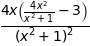

In [3]:
sp.diff(f_s(x), x, 3)

In [4]:
print(f_s(x))
print(sp.diff(f_s(x), x, 1))
print(sp.diff(f_s(x), x, 2))
print(sp.diff(f_s(x), x, 3))


log(x**2 + 1)
2*x/(x**2 + 1)
2*(-2*x**2/(x**2 + 1) + 1)/(x**2 + 1)
4*x*(4*x**2/(x**2 + 1) - 3)/(x**2 + 1)**2


[-0.         -0.0433832  -0.09216949 -0.14675178 -0.20749549 -0.2747196
 -0.34867367 -0.42951059 -0.51725552 -0.61177148 -0.71272293 -0.81953924
 -0.93138078 -1.04711109 -1.16527943 -1.28411812 -1.4015594  -1.51527551
 -1.62274433 -1.7213407  -1.80845033 -1.8816     -1.9385946  -1.97764915
 -1.99750277 -1.99750277 -1.97764915 -1.9385946  -1.8816     -1.80845033
 -1.7213407  -1.62274433 -1.51527551 -1.4015594  -1.28411812 -1.16527943
 -1.04711109 -0.93138078 -0.81953924 -0.71272293 -0.61177148 -0.51725552
 -0.42951059 -0.34867367 -0.2747196  -0.20749549 -0.14675178 -0.09216949
 -0.0433832  -0.        ]


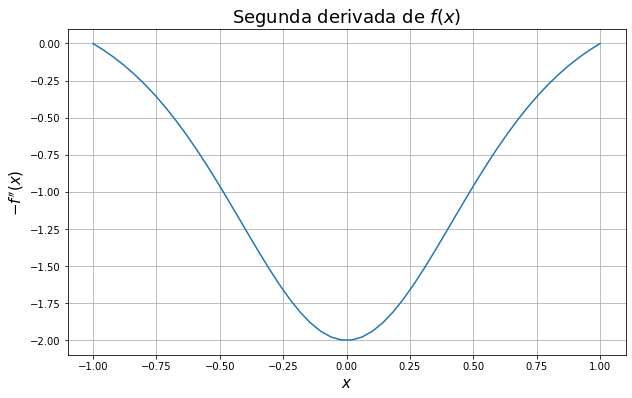

In [12]:
#Numpy funcion para evaluar la funcion de sympy
f2 = sp.diff(f_s(x), x, 2)

#numpy funcion
fxn5 = sp.lambdify(x, -f2, 'numpy')

x_ = np.linspace(-1, 1)
print(fxn5(x_))

#Gráfica de la segunda derivada de f(x) invertida para hllar el mínimo, esto es, el máximo en f''(x)
plt.figure(figsize=(10,6))
plt.plot(x_, fxn5(x_))
plt.title('Segunda derivada de $f(x)$', size=18)
plt.xlabel("$x$", size =15)
plt.ylabel("$-f''(x)$", size=15)
plt.grid()
plt.show()

In [15]:
# HAlla el mínimo de -f''(x), con el finde hallar el máximo en f''(x)
fp=optimize.fmin_powell( fxn5, 0.1,  ftol=1E-7 )

Optimization terminated successfully.
         Current function value: -2.000000
         Iterations: 2
         Function evaluations: 32


In [38]:
# Punto del mínimo de -f''(x)
fp

array(2.71379983e-09)

In [13]:
# Maximo de la función, f''(x)
Max = np.max(-fxn5(x_))
print(Max)

1.99750277488715


$$
  |E_N(f)| \le  \frac{(b-a) h^2}{12} f''(\xi), = 1 *2\frac{h^2}{12}= \frac{h^2}{6}<\epsilon
  $$
  
  > $\epsilon=0.001$
  
  $$
  \frac{h^2}{6}<\epsilon
  $$
  
  $$
  h = \sqrt{6\epsilon}= \sqrt{0.006}
  $$
  
  

In [19]:
# Paso de la función a integrar
h = np.sqrt(0.006)
print("El tamaño de cada paso es %.5lf:"  %h)

# Número de particiones
print("El numero de intervalos es: %.5lf" %((b-a)/h) )

El tamaño de cada paso es 0.07746:
El numero de intervalos es: 12.90994


Lo anterior implica, que el número minimo de intervalos para realizar la integral con un error de 0.001, es de N=13. Empleando la ecuacion para resolver la integral por el metodo del trapecio compuesto, tenemos que: 

\begin{equation}
\int_{a}^{b}f(x)dx=  \frac{h}{2}\left[f(a)+2\sum_{j=1}^{n-1}f(x_j)+f(b)\right ]
\end{equation}



In [21]:
# Número de particiones y limites de integración
N = 13
a, b = 0, 1 
# Tamaño del Paso
h = float((b - a)/N)

#Definición de los puntos extremos
x = np.linspace(a, b, N+1) 

In [22]:
# Puntos del interior
x_interior = x[1:-1]  
# Función evaluada en el limite inferior
T1 =  (f(a))
# Función evaluada en el limite superior
T3 =  (f(b))
# Función evaluada en los puntos interiores a los limites de integración
T2 =  sum(f(x_interior))

# Sumatoria de los valores y multiplicación por el tamaño del paso 
trap_ = T1 + 2*T2 + T3
trap_f = 0.5*h*trap_

print("El valor de la integral es: %.8lf " %trap_f)


El valor de la integral es: 0.26443665 


In [23]:
# Iprtar libreria para integrales de scipy
from scipy import integrate

# Cálculo de la integral con la función integrate trapezoide de scipy
t = integrate.trapz( f(x), x, h )
print("El valor, empleando la libreria integrate es: %.8lf" %t)

El valor, empleando la libreria integrate es: 0.26443665


In [26]:
#Comparando con el valor exacto, tenemos que: 
# Función quad de scipy.integrate
from scipy.integrate import quad

# Integral con la función quad
quad_python = quad(f, a, b)
print ("Cuadratura de python:", quad_python)
Iq = quad_python [0]

# Comparación con la integral obtenida en la sumatoria
print ("Diferencia: %.5f" %( (trap_f - Iq)/Iq))

Cuadratura de python: (0.26394350735484196, 2.930361590656649e-15)
Diferencia: 0.00187


#Metodo de Simpson


 En general, la regla de simpson es
 
$$
 \int_a^b f(x)dx = \frac{h}{3}\left[f(a) + 2\sum_{i=1}^{(n-1)}f(x_{2i}) + 4\sum_{i=1}^{n}f(x_{2i-1}) + f(b)\right]-\frac{b − a}{180}h^4f^{(4)}(\xi)
,$$
 
 donde $\xi ∈ (a,b).$
error=0.001


In [27]:
# Función y limites de integración
a, b = 0,  1.
def f(x): 
  return np.log(1 + x ** 2)
epsilon = 0.001

#epsilon = 1e-5

In [28]:
# Función para emplear el método de simpson
def simpson(f, a, b, N):
    """
    Aproxima la integral de $f$ en $[a,b]$ mediante la fórmula compuesta 
    de Simpson con N subintervalos
    """
    n_nodos = 2*N+1 # (N+1 extremos de subintervalos) + (N puntos medios)
    x = np.linspace(a, b, n_nodos)

    x_impar = x[1: :2] # Nodos con coordenada impar (ptos medios)
    x_par = x[2:n_nodos-1:2] # Nodos con coordenada par (salvo el primero y el último)

    h = (b-a)/(2*N) # Distancia entre dos nodos de integración
    cuad = h/3*(f(a) + 2*sum(f(x_par)) + 4*sum(f(x_impar)) + f(b)) # F. comp. de Simpson
    return cuad  
  
#- La expresión `x`, o `x[:]`, representa todos los elementos de la lista x
#- La expresión `x[M:N]`, o `x[M:]`, representa los elementos `x[M]`, `x[M+1]`,..., `x[N-1]`
#- La expresión `x[M:N:k]`, o `x[M::k]`, representa los elementos `x[M]`, `x[M+k]`,..., `x[N-1]`
#x = np.linspace(0, 1, 10)
#x_impar = x[1:: 2]  
#x_par = x[2: -1: 2]
#print(x)
#print(x_impar)
#print(x_par)  

In [29]:
# Integral de f(x) con el método de simpson
x = simpson(f, 0, 1, 20)
print(x)

0.26394350518567283


## Para deducir el numero de intervalos tenemos que : 
$$
\frac{b − a}{180}h^4f^{(4)}(\xi) = \epsilon
$$

$$
\frac{b − a}{180}h^4 \mathrm{Max} ||f^{(4)}(\xi)||=\epsilon
$$

con $$h = (b-a)/(2N)$$

$$
\frac{(b − a)^5}{180(2N)^4} \mathrm{Max} ||f^{(4)}(\xi)||=\epsilon
$$

$$
N^4 = \frac{(b − a)^5}{180(2)^4\epsilon} \mathrm{Max} ||f^{(4)}(\xi)||
$$

In [30]:
# Def de f(x)
f_s = lambda x: sp.log(1 + x**2)

x = sp.symbols("x")

# Cálculo de las derivadas de f(x)
print(f_s(x))
print(sp.diff(f_s(x), x, 1))
print(sp.diff(f_s(x), x, 2))
print(sp.diff(f_s(x), x, 3))
print(sp.diff(f_s(x), x, 4))


log(x**2 + 1)
2*x/(x**2 + 1)
2*(-2*x**2/(x**2 + 1) + 1)/(x**2 + 1)
4*x*(4*x**2/(x**2 + 1) - 3)/(x**2 + 1)**2
12*(-8*x**4/(x**2 + 1)**2 + 8*x**2/(x**2 + 1) - 1)/(x**2 + 1)**2


[12.         11.95009361 11.80124435 11.55603605 11.21868988 10.79494054
 10.29187077  9.71771136  9.0816152   8.39341451  7.66337093  6.90192756
  6.1194715   5.32611444  4.53149713  3.74462252  2.97372025  2.22614402
  1.50830157  0.82561607  0.18251637 -0.41754692 -0.97206344 -1.47940701
 -1.93876566 -2.35006168 -2.71386543 -3.03130622 -3.30398314 -3.53387829
 -3.72327433 -3.8746778  -3.99074921 -4.07424061 -4.12794086 -4.15462866
 -4.15703306 -4.1378012  -4.09947262 -4.0444596  -3.97503298 -3.89331257
 -3.80126184 -3.70068589 -3.59323238 -3.48039484 -3.36351768 -3.24380275
 -3.12231685 -3.        ]


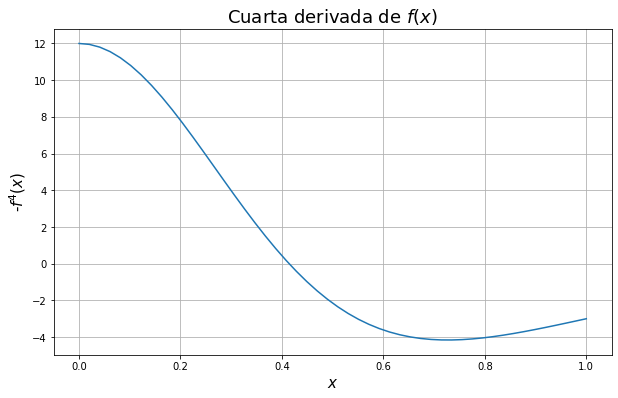

In [41]:
#Numpy funcion para evaluar la funcion de sympy
f2 = sp.diff(f_s(x), x, 4)

#numpy funcion
Fxn5 = sp.lambdify(x, -f2, 'numpy') 

x_ = np.linspace(0, 1)
print(Fxn5(x_))

plt.figure(figsize=(10,6))
plt.plot(x_, Fxn5(x_))
plt.title('Cuarta derivada de $f(x)$', size = 18)
plt.xlabel("$x$", size = 15)
plt.ylabel("-$f^{4}(x)$", size = 15)
plt.grid()
plt.show()

In [36]:
# Hallar el mpinimo de menos la cuarta derivada de f(x)
min = optimize.fmin_powell(Fxn5, 0)

Optimization terminated successfully.
         Current function value: -4.158814
         Iterations: 2
         Function evaluations: 37


In [39]:
# Máximo de la cuarta derivada de f(x)
M = abs(Fxn5(min))
M

In [42]:
epsilon=1e-5
# Cálculo de N
def N(a, b, M):
  return ((b-a)**5*M/(epsilon*180*2**4))**(1./4)

N(0,1,M)

In [45]:
# Integral con el método de simpson y el N hallado
simp = simpson(f, a, b, 3)
print(simp)

0.26393930983357405


In [46]:
#Comparando con el valor exacto, tenemos que: 
from scipy.integrate import quad
quad_python = quad(f, a, b)

In [49]:
# Comparación entre los valores de la integral con dos métodos
print ("Cuadratura de python:", quad_python)
Iq = quad_python [0]

print ("Diferencia: %.6f" %( (simp - Iq)/Iq))

Cuadratura de python: (0.26394350735484196, 2.930361590656649e-15)
Diferencia: -0.000016


## $\textbf{Tarea}$

Emplear el metodo de trapezio y el metodo de simpson para calcular la siguiente integral: 

\begin{equation}
\int_0^{2} e^{2x}\sin 3x dx 
\end{equation}
$\epsilon=1\times 10^{-5}$

In [52]:
# Definición de la función a integrar
x = sp.symbols("x")
F = lambda x: sp.exp(2*x)*sp.sin(3*x)

In [53]:
# Segunda y cauarta derivada de F(x)
F2 = sp.diff(F(x), x, 2)
F4 = sp.diff(F(x), x, 4)

In [54]:
# Función de numpy
fx = sp.lambdify(x, F(x), 'numpy')
Fxn2 = sp.lambdify(x, F2, 'numpy')
Fxn4 = sp.lambdify(x, F4, 'numpy')

## $\textbf{Método del Trapecio}$

In [55]:
x_ = np.linspace(0, 2, 100)

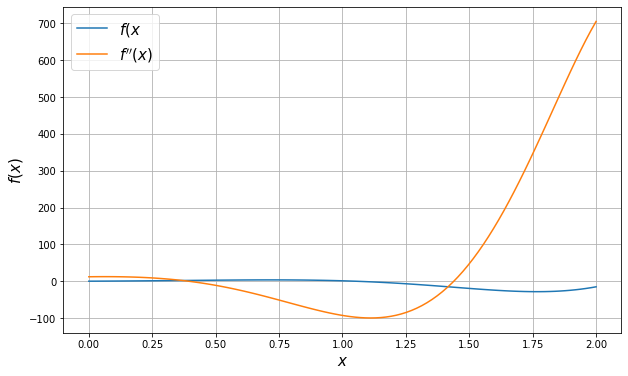

In [58]:
# Gráfica de fx(x) y de su segunda derivada

plt.figure(figsize=(10,6))
plt.plot(x_, fx(x_), label="$f(x$")
plt.plot(x_, Fxn2(x_), label="$f''(x)$")
plt.xlabel("$x$", size = 15)
plt.ylabel("$f(x)$", size = 15)
plt.legend(fontsize = 15)
plt.grid()
plt.show()

In [60]:
# Menos la 2da derivada de f(x)
fxn2 = sp.lambdify(x, -F2, 'numpy')

In [61]:
# Mínimo de menos la 2da derivada de f(x)
min1 = optimize.fmin_powell( fxn2, 0.1,  ftol=1E-7 )

Optimization terminated successfully.
         Current function value: -12.303633
         Iterations: 2
         Function evaluations: 39


In [62]:
# Máximo de la 2da derivada de f(x)
max1 = abs(Fxn2(min1))
max1


> $$
  \int_{a}^{b} f(x)\,dx 
  = \sum_{i=0}^{N-1}  \int_{i}^{x_{i+1}} f(x)\,dx
  =  \frac{h}{2} \sum_{i=0}^{N-1}(f(x_i)+f(x_{i+1})) 
    - \frac{(b-a) h^2}{12}f''(\xi),
  $$


In [73]:
# Hallar el valor del tamaño del paso con el valor máxio para la 2da derivada de f(x)
M = max1
T_1 = (b-a)*M/12
M = 12.30
b_ = 2
a_ = 0
h_ = np.sqrt((epsilon*12)/((b-a)*M))
print(f"{h_}")

0.002208630521496931


In [113]:
# Hallar el número de particiones en el intervalo
N1_ = int((b_- a_)/h_)

print(f"N= {N1_}")

N= 905


In [114]:
# Intervalo
X = np.linspace(a_,b_,N1_ + 1)

# Puntos del interior
X_interior = X[1:-1]  
# Función evaluada en el limite inferior
T11 =  (F(a))
# Función evaluada en el limite superior
T13 =  (F(b))
# Función evaluada en los puntos interiores a los limites de integración
T12_ =  []
for i in X_interior:
  s = F(i)
  T12_ = T12_ + [s]

T12 = sum(T12_)

# Sumatoria de los valores y multiplicación por el tamaño del paso 
Trap_ = T11 + 2*T12 + T13
Trap_f = 0.5*h_*Trap_

print("El valor de la integral es: %.8lf " %Trap_f)

El valor de la integral es: -14.20547390 


In [115]:
# Evaluando la integral con la función de scipy trapz
t_ = integrate.trapz( fx(x_), x_, h )
print("El valor, empleando la libreria integrate es: %.8lf" %t_)

# Integral real con la función quad de scipy
Int = quad(fx,0,2)
difference1 = (Trap_f - Int[0])/Int[0]
print('Error entre el método del trapecio y el valor real de la función quad: %.6f' %abs(difference1))

El valor, empleando la libreria integrate es: -14.20976832
Error entre el método del trapecio y el valor real de la función quad: 0.000598


## $\textbf{Método de Simpson}$

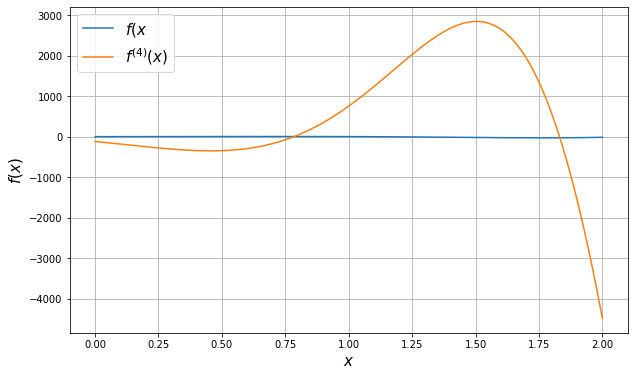

In [90]:
#Gráfica de la función y la 4ta derivada

plt.figure(figsize=(10,6))
plt.plot(x_, fx(x_), label="$f(x$")
plt.plot(x_, Fxn4(x_), label="$f^{(4)}(x)$")
plt.xlabel("$x$", size = 15)
plt.ylabel("$f(x)$", size = 15)
plt.legend(fontsize = 15)
plt.grid()
plt.show()

In [94]:
# Mínimo de menos la 4ta derivada

Fxn4_ = sp.lambdify(x, -F4, 'numpy')
min3 = optimize.fmin_powell(Fxn4_,3)

Optimization terminated successfully.
         Current function value: -187593.517358
         Iterations: 2
         Function evaluations: 29


In [96]:
# Máximo de la 4ta derivada

Max3 = abs(Fxn4(min3))
Max3

In [98]:
epsilon=1e-5
# Cálculo de N
def N(a, b, M):
  return ((b-a)**5*M/(epsilon*180*2**4))**(1./4)
  
N_ = N(0,2,int(Max3))
N_

In [100]:
# Integral con el método de simpson y el N hallado
simp1 = simpson(fx, a_, b_, int(N_))
print(f'Valor de la integral empleando el método de Simpson: {simp1}')

Valor de la integral empleando el método de Simpson: -14.213977098654395


In [116]:
# Valor real de la integral 

Int = quad(fx,0,2)
print(f'Valor real de la integral con la función Quad de Scipy: {Int[0]}')

# Error entre el valor hallado y el valor real
difference = (simp1 -Int[0])/Int[0]
print('Error entre el cálculo empleado con simpson y la función quad: %.8f' %difference)

Valor real de la integral con la función Quad de Scipy: -14.213977129862519
Error entre el cálculo empleado con simpson y la función quad: -0.00000000
